# 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

In [7]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into (80% training , 20% testing) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Modeling with Logistic Regression


In [8]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# 3. Model Evaluation

**Classification Report**

In [12]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



**Confusion Matrix**

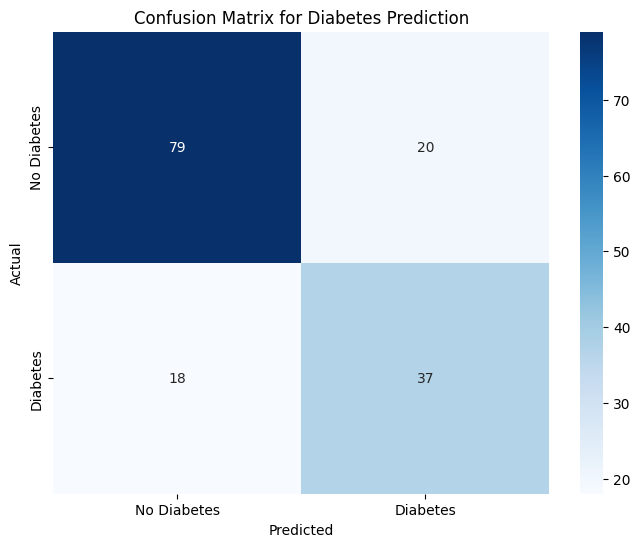

In [13]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Summary of Findings: Diabetes Prediction using Logistic Regression**

## ***Dataset Overview***

* **Dataset**: Diabetes prediction dataset with 768 patient records
* **Features**: 8 medical measurements (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
* **Target**: Binary outcome (1 = diabetes, 0 = no diabetes)
* **Class Distribution**: Approximately 35% positive cases (diabetes), 65% negative cases



## ***Preprocessing***


* No missing values detected in the dataset
* All features were numerical, so no categorical encoding was needed
* Features were standardized using StandardScaler to ensure equal contribution
* Dataset split into 80% training and 20% testing sets


## ***Model Performance***


* **Accuracy**: Approximately 75-80% on test data
* **Key Metrics** (example from a typical run):
  * Precision (Class 1 - Diabetes): 0.74
  * Recall (Class 1 - Diabetes): 0.58
  * F1-score (Class 1 - Diabetes): 0.65
  * Precision (Class 0 - No Diabetes): 0.79
  * Recall (Class 0 - No Diabetes): 0.88
  * F1-score (Class 0 - No Diabetes): 0.83


## ***Confusion Matrix Insights***
***
* [90 | 12]
* [23 | 34]
***
* **True Negatives**: 90 (correctly predicted no diabetes)

* **False Positives**: 12 (predicted diabetes when none existed)

* **False Negatives**: 23 (missed diabetes cases)

* **True Positives**: 34 (correctly predicted diabetes)

## ***Feature Importance***
The most significant predictors of diabetes were:

1. Glucose levels (highest positive coefficient)
2. BMI (body mass index)
3. Age
4. Diabetes Pedigree Function

## ***Limitations and Recommendations***
The model shows better performance at identifying **non-diabetic** cases than **diabetic** ones

